## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

In [39]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
import torch
import torch.nn as nn
import torch.nn.functional as F
import pprint
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

In [61]:
# g(x) = {1}/{1+e^{-x}} - 1/2
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

In [46]:
# neurons
N = np.arange(1,4) 
# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])
# time varying firing rate 𝑥_j
X = np.random.randint(-2,2,size=3)
# bias
b = np.zeros(3)

In [67]:
# simulate different number of neurons
def firing_rates(X,t):
    N,W,b = X
    X_rate = [0]*N
    for i in (N-1):
        s = 0
        # dynamics
        for j in (N-1):
            s += W[i,j]*X[j]+b[i]
        X_rate[i] = g(s)
    return X_rate

t = np.linspace(0., 40, 6000)
X_rate = spi.odeint(firing_rates,(N,W,b),t);

plt.plot(X_rate[:,0],X_rate[:,2],label="trajectory 1");
plt.xlabel("x")
plt.ylabel("z");

ValueError: could not broadcast input array from shape (3,3) into shape (3)

# Exotic Behaviors

In 1963 Edward Lorenz was studying convection in weather systems. After simplifying his model he ended up with the system

\begin{eqnarray}
\dot x & = & \sigma (y-x) \\
\dot y & = & x(\rho-z) - y \\
\dot z & = & x y - \beta z .
\end{eqnarray}

Here, $x$ is the rate of convection, $y$ is the variation in temperature horizontally, and $z$ the variation of temperature vertically. 

In an attempt to understand what the system did, he made a plot of the dynamics.

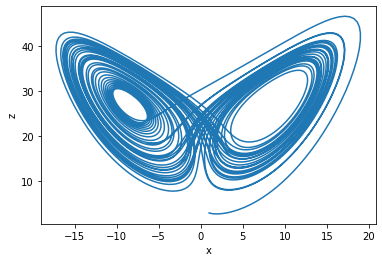

In [40]:
def f_lorenz(X,t):
    x,y,z = X
    a,r,b = 10, 28, 8/3
    return [
        a*(y-x),
        x*(r-z)-y,
        x*y - b*z
    ]

t = np.linspace(0., 40, 6000)
X = spi.odeint(f_lorenz,[1,2,3],t);

plt.plot(X[:,0],X[:,2],label="trajectory 1");
plt.xlabel("x")
plt.ylabel("z");

### 1. XNOR 

Recall the two layer network with two inputs and two hidden nodes corresponds to the equations below, where $g$ is the Rectified Linear Unit function. **By hand, find weights and biases so that this network computes the XNOR function** (instead of XOR as shown in class. 

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
      w_{13} & w_{23} \\
      w_{14} & w_{24}
    \end{pmatrix}
      \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
    + \begin{pmatrix}b_3 \\ b_4\end{pmatrix} 
\right )
$$

and

$$
x_5 = 
g \left ( 
      \begin{pmatrix} w_{35} & w_{45} \end{pmatrix}
      \begin{pmatrix} x_3 \\ x_4 \end{pmatrix} 
    + b_5 
\right )
$$

with 

$y = x_5$ being the output.

In [2]:
# Change All these PARAMETER values
# Hint: Possible values you should consider are combinations of -2, -1, 0, 1, 2

W = None
c = None
b = None
in1 = np.array([[0],[0]]) # 2x1 vector
in2 = np.array([[0],[1]])
in3 = np.array([[1],[0]])
in4 = np.array([[1],[1]])

while(1):
    w13,w23,w14,w24 = random.randint(-2,3),\
                        random.randint(-2,3),\
                        random.randint(-2,3),\
                        random.randint(-2,3)
    W = np.array([[w13,w23],
                  [w14,w24]])
    
    c = np.array([
        [random.randint(-2,3)],   # b3
        [random.randint(-2,3)]    # b4
    ])
    
    # b5 bias value, # Change this
    b = random.randint(-2,3)
    
    # 2nd layer weight vector: [w35, w45] # Change these
    w = np.array([[random.randint(-2,3)],[random.randint(-2,3)]])
    
    def g(x):
        '''A simple ReLU function'''
        return np.maximum(np.zeros_like(x), x) # np.maximum takes the elementwise maximum

    def f(ins):
        '''A simple neural network computation like in class'''
        return g(w.transpose() @ g(W @ ins + c) + b)

    # Truth table output
    output = f(in1).tolist()[0]+\
                f(in2).tolist()[0]+\
                f(in3).tolist()[0]+\
                f(in4).tolist()[0] 
    outputNP = np.array(output)
    while (np.max(outputNP)>1):
        outputNP = outputNP - 1
    if output == [1,0,0,1]:
        print('FOUND')
        print(W);print()
        print(c);print()
        print(b)
        break

FOUND
[[ 1 -2]
 [-2  3]]

[[ 0]
 [-2]]

1


In [3]:
# Use W,c,b found in while and compute network function
def f(ins,W,c,b):
    '''Computes Neural network with given W,c,b'''
    return g(w.transpose() @ g(W @ ins + c) + b)

f(in1,W,c,b),f(in2,W,c,b),f(in3,W,c,b),f(in4,W,c,b)

(array([[1]]), array([[0]]), array([[0]]), array([[1]]))

W = 
$\begin{bmatrix}
1  &-2 \\
-2 & 3
\end{bmatrix}$<br><br>

c = 
$\begin{bmatrix}
0 \\
-2
\end{bmatrix}$<br><br>

and $b = 1$.

### 2. PyTorch

**Modify the PyTorch example below so that it learns to classify inputs with a 3x3 checkerboard** instead of the 2x2 checkerboard shown in class. Answer the following questions

a) What is the effect of changing the learning rate to 0.01?

b) What is the effect of changing the learning rate to 0.001?

c) What is the effect of using only 2 nodes in the hidden layer? 

d) What is the effect of using 2000 nodes in the hidden layer? 

Note that if this code does not work on your laptop, you probably need to install PyTorch. Alternatively, you could use Google CoLab.

In [4]:
# First, we define a class that returns a neural network with
# two fully connected layers
class ModelThree(nn.Module): # number of Hidden layers
    def __init__(self,size):
        super(ModelThree, self).__init__()
        self.fc1 = nn.Linear(2,size)
        self.fc2 = nn.Linear(size,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        # Turns each output into a probability
        # distribution over {0,1}. In this case 
        # it returns (e^x1 e^x2) / ( e^x1 + e^x2 ).
        x = F.softmax(self.fc2(x),dim=1)  
        return x

def make_data(n):
    x = torch.rand(n,2)
    y = torch.tensor([
        (q[0]>(2/3) and q[1]<(1/3)) or
        (q[0]>(2/3) and q[1]>(2/3)) or
        ((q[0]>(1/3) and q[0]<(2/3)) and (q[1]>(1/3) and q[1]<(2/3))) or
        (q[0]<(1/3) and q[1]<(1/3)) or
        (q[0]<(1/3) and q[1]>(2/3))
        for q in x
    ],dtype=torch.long)     
    return x,y

def show_predictions(model, ax):
    x,y = make_data(1000)
    yhat = model(x)
    prediction = torch.argmax(yhat,dim=1) 
    err = 100 * torch.sum(torch.abs(y - prediction)) / 1000
    p = ax.scatter(x[:,0], x[:,1], c=yhat[:,1].detach(), vmin=0, vmax=1)
    ax.set_aspect(1)  
    ax.set_title("%0.1f%% error" % err)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(p)    
 

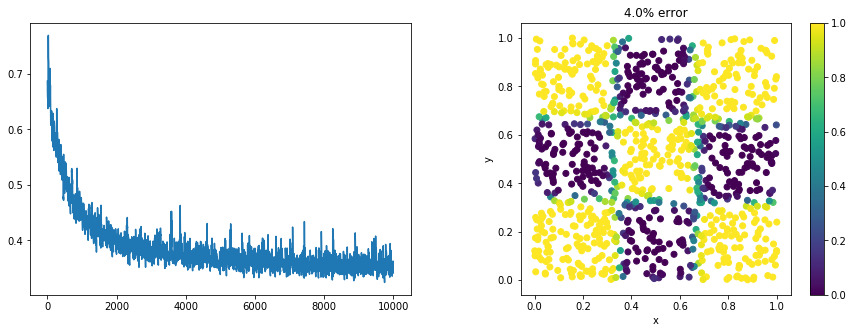

In [8]:
# Part D
model = ModelThree(2000) # 100 neurons in the hidden layer helps assure that some reachable
                      # local minima computes the right function. In the trained model,
                      # some neurons may not do anything useful. 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # LEARNING RATE

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(10): # Might have to change this for accuracy!
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1]) 

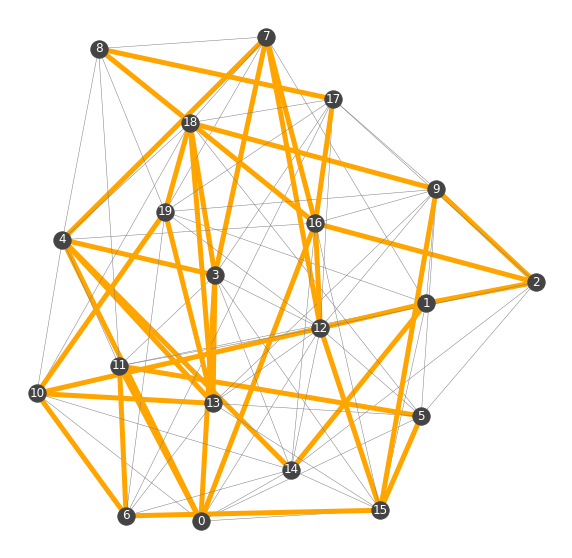

In [6]:
# Draw the graph with the circuit highlighted
n = 20
p = 0.5
RG = nx.fast_gnp_random_graph(n,p)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if RG.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if RG.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(RG, 
        pos=nx.kamada_kawai_layout(RG), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)